# Exploratory Data Analysis

* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Original raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries**

In [60]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [61]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Set path to save visualizations
viz_path=r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [62]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0620_Weather_Energy.csv', 
                 parse_dates=['date_time'],index_col='date_time')

# Data Overview

**Data Preview**

In [63]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


**Description Statistics**

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35070.0,383.536128,85.348006,0.000000,333.000,367.0000,433.000,592.0000
generation fossil brown coal/lignite,35070.0,448.060251,354.603125,0.000000,0.000,509.0000,757.000,999.0000
generation fossil gas,35070.0,5622.474309,2201.444741,0.000000,4126.000,4969.0000,6428.750,20034.0000
generation fossil hard coal,35070.0,4256.296179,1961.968024,0.000000,2527.000,4474.0000,5839.000,8359.0000
generation fossil oil,35070.0,298.335358,52.518153,0.000000,263.000,300.0000,330.000,449.0000
generation hydro pumped storage consumption,35070.0,475.867237,792.594472,0.000000,0.000,68.0000,617.000,4523.0000
generation hydro run-of-river and poundage,35070.0,972.117536,400.740520,0.000000,637.000,906.0000,1250.000,2000.0000
generation hydro water reservoir,35070.0,2605.122241,1835.141359,0.000000,1077.250,2165.0000,3757.000,9728.0000
generation nuclear,35070.0,6263.475278,840.224889,0.000000,5759.000,6564.0000,7025.000,7117.0000
generation other,35070.0,60.226461,20.238237,0.000000,53.000,57.0000,80.000,106.0000


**Variable Information**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35070 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35070 non-null  float64
 1   generation fossil brown coal/lignite         35070 non-null  float64
 2   generation fossil gas                        35070 non-null  float64
 3   generation fossil hard coal                  35070 non-null  float64
 4   generation fossil oil                        35070 non-null  float64
 5   generation hydro pumped storage consumption  35070 non-null  float64
 6   generation hydro run-of-river and poundage   35070 non-null  float64
 7   generation hydro water reservoir             35070 non-null  float64
 8   generation nuclear                           35070 non-null  float64
 9   generation other                     

**Missing Values**

In [66]:
df.isna().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
price actual                                   0
temp                                           0
total load actual                              0
dtype: int64

## Variable Distributions

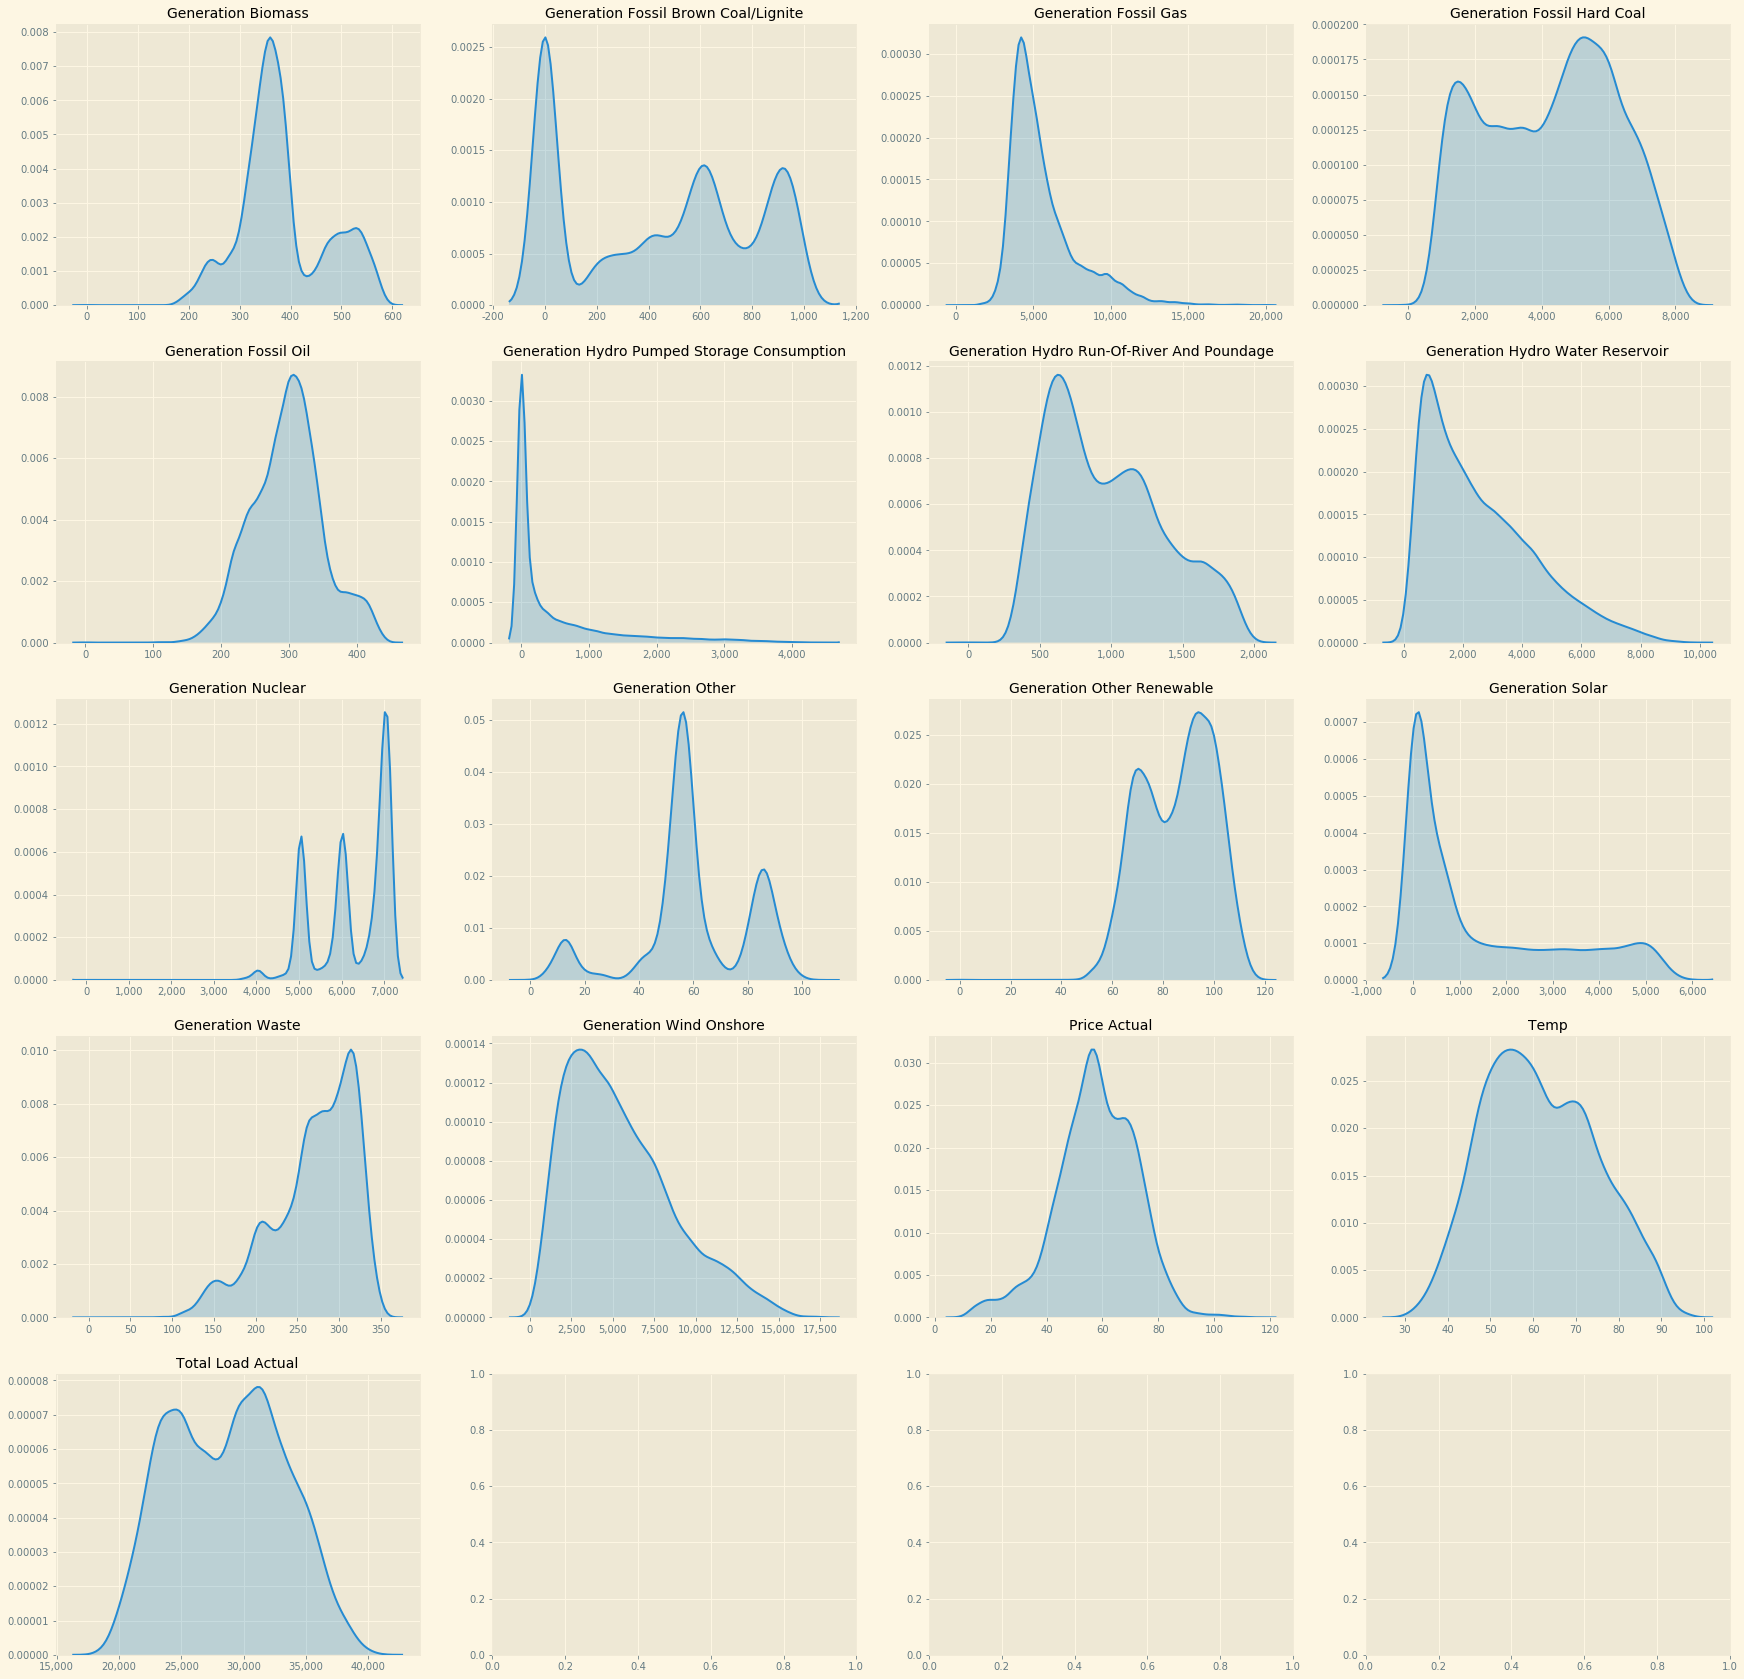

In [67]:
#Set figure
f, axes = plt.subplots(5,4, figsize = (30,30))

#Plot KDE of each variable in df
for col, ax in zip(df.columns, axes.flat):
    sns.kdeplot(df[col], shade = True, legend = False, ax=ax)
   
    ###Set plot aesthetics###
    ax.set_title(str.title(col), fontsize = 14)
    ax.set_xlabel('')
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


#Save fig##
plt.savefig(viz_path + '/Data_Distributions.png',bbox_inches='tight')

**Target distribution**

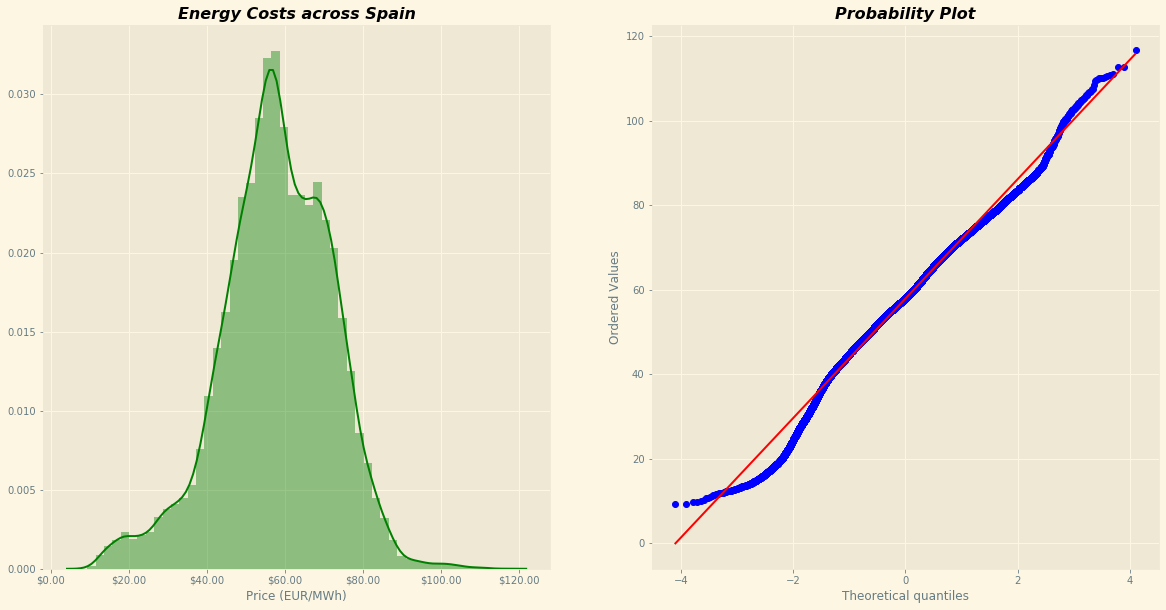

In [68]:
#Set figure
f, ax = plt.subplots(1,2,figsize = (20,10))

#Plot data
sns.distplot(df['price actual'],color = 'g',ax=ax[0])
stats.probplot(df['price actual'], plot = ax[1])

###Set plot aesthetics###
#Title
ax[0].set_title('Energy Costs across Spain', fontweight = 'semibold', style = 'italic')
ax[1].set_title('Probability Plot', fontweight = 'semibold', style = 'italic')

#Axes
ax[0].set_xlabel('Price (EUR/MWh)')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))


#Save fig##
plt.savefig(viz_path + '/Price_Distribution.png',bbox_inches='tight')

- Run statistics tests and plots against ttarget
- Plot target under variab;e

## Correlations

**Heat Map**

Features most correlated w/ target:
['generation fossil gas', 'generation fossil hard coal', 'generation hydro pumped storage consumption', 'price actual', 'total load actual']


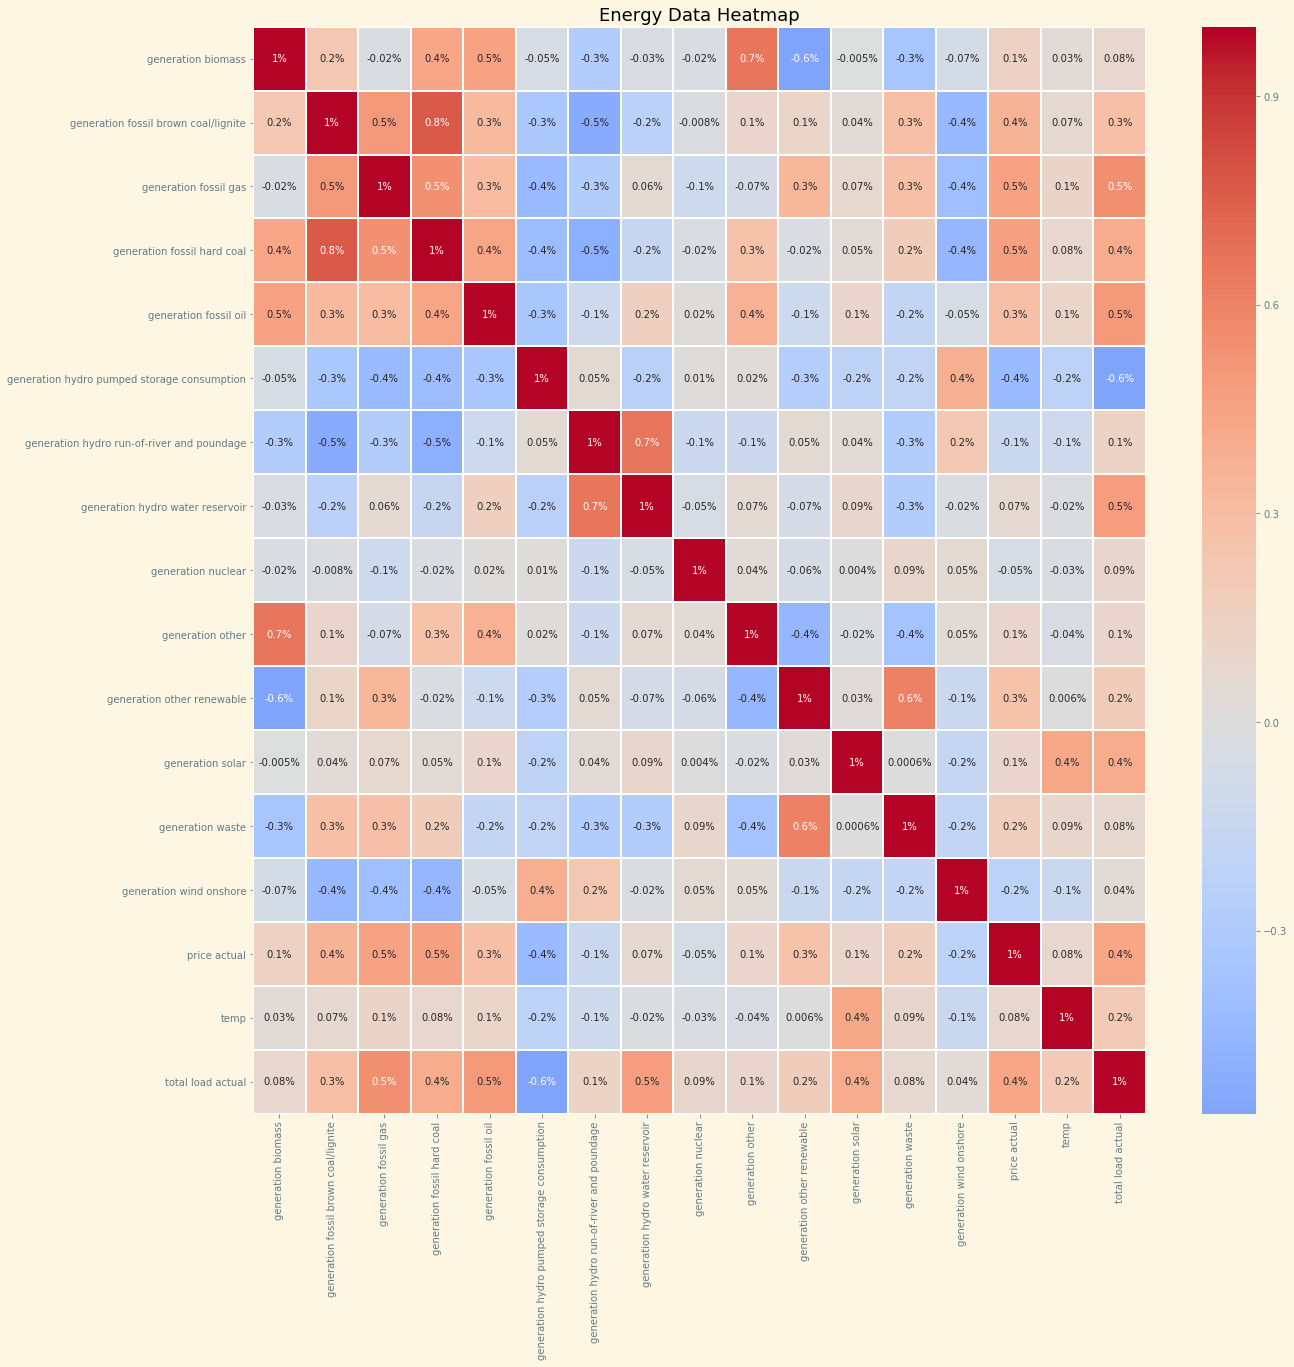

In [69]:
#Set plot
f, ax = plt.subplots(figsize = (20,20))

#Create correlation matrix
corr = df.corr()


#Create heatmap
sns.heatmap(corr, annot=True,fmt='.1g',cmap = 'coolwarm', linewidths=1,annot_kws=None, center = 0,
            linecolor='white', ax = ax)

###Set plot aesthetics###
#Title
ax.set_title('Energy Data Heatmap', fontsize = 18)

#Format annotations
for t in ax.texts: t.set_text(t.get_text() + "%")
    
#Subset feature w/ correlations > .4 or < -.4 with price_actual
correlated_features = corr.loc[(corr['price actual'] > .4)|(corr['price actual'] < -.4)].index.tolist()

#Print features most correlated w/ target
print('Features most correlated w/ target:\n{}'.format(correlated_features))
    
#Save fig#
plt.savefig(viz_path + '/Correlation_Matrix.png',bbox_inches='tight')

## Target Time Plots

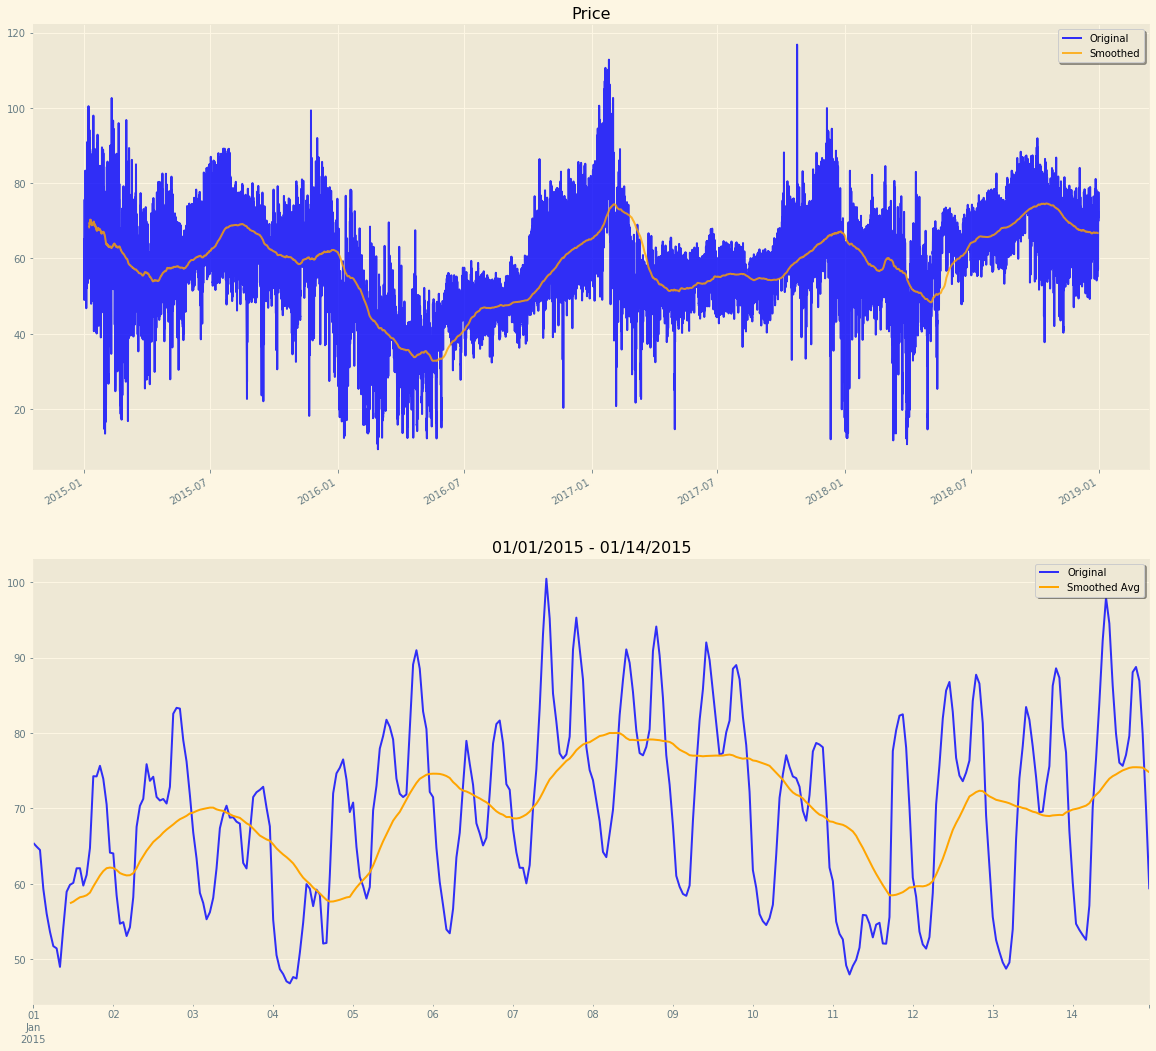

In [70]:
#Plot predictions against actual
from TimeseriesPlotter import timeseries_plot

#Set figure size
f, ax = plt.subplots(2,1, figsize = (20,20))

#PLot raw data
timeseries_plot(df['price actual'], ax=ax[0], label = 'Original', color = 'blue', alpha = .8)
timeseries_plot(df['price actual'].rolling(min_periods=24*7, window=24*7*8).mean(), ax=ax[0],title = 'Price', label = 'Smoothed', color = 'orange', alpha = .8, legend = True)

#Plot zoomed data
timeseries_plot(df['price actual'][:24*14], ax=ax[1], label = 'Original',color = 'blue', alpha = .8)
timeseries_plot(df['price actual'][:24*14].rolling(min_periods=12, window=24).mean(), color = 'orange',ax =ax[1], title = '01/01/2015 - 01/14/2015', legend=True,label = 'Smoothed Avg')  

    
#Save fig#
plt.savefig(viz_path + '/Target_Plot.png',bbox_inches='tight')

## How does price vary by day of the week? How about by month?

**Prepare Data**

In [71]:
#Subset price and reset_index to extract date information from price
price_df = df['price actual'].reset_index()

#Split date_time into date and time cols, convert to datetime data types and set index: date_time col
price_df[['date','time']] = price_df['date_time'].apply(lambda x: pd.Series(str(x).split(sep = ' ')))
price_df['date'] = pd.to_datetime(price_df['date'])
price_df.set_index('date_time',  inplace = True)


#Check
display(price_df.head())

,price actual,date,time
date_time,,,
2015-01-01 00:00:00,65.41,2015-01-01,00:00:00
2015-01-01 01:00:00,64.92,2015-01-01,01:00:00
2015-01-01 02:00:00,64.48,2015-01-01,02:00:00
2015-01-01 03:00:00,59.32,2015-01-01,03:00:00
2015-01-01 04:00:00,56.04,2015-01-01,04:00:00


In [72]:
#Extract Year,Month,weekday 
price_df['year'] = price_df.date.dt.year
price_df['month'] = price_df.date.dt.month_name()
price_df['weekday'] = price_df.date.dt.day_name()

#Check
display(price_df.head())

,price actual,date,time,year,month,weekday
date_time,,,,,,
2015-01-01 00:00:00,65.41,2015-01-01,00:00:00,2015,January,Thursday
2015-01-01 01:00:00,64.92,2015-01-01,01:00:00,2015,January,Thursday
2015-01-01 02:00:00,64.48,2015-01-01,02:00:00,2015,January,Thursday
2015-01-01 03:00:00,59.32,2015-01-01,03:00:00,2015,January,Thursday
2015-01-01 04:00:00,56.04,2015-01-01,04:00:00,2015,January,Thursday


**Monthly Price Boxplots**

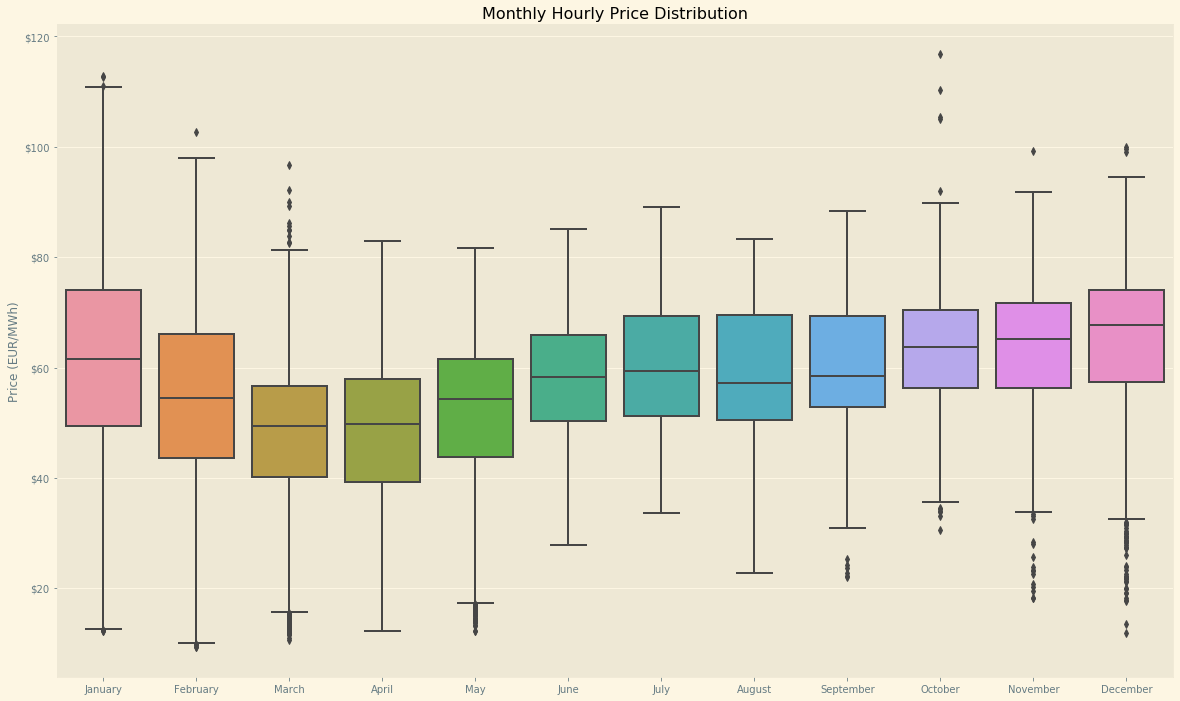

In [73]:
#Set figure
f, ax = plt.subplots(figsize = (20,12))

#Plot data
sns.boxplot(x = 'month', y=price_df['price actual'],
            data = price_df, ax = ax)

###Set plot aesthetics###
ax.set_title('Monthly Hourly Price Distribution')
ax.set_xlabel('')
ax.set_ylabel('Price (EUR/MWh)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

#Save fig
plt.savefig(viz_path + '/Monthly_Boxplots.png',bbox_inches='tight')

**Weekday Price Boxplots**

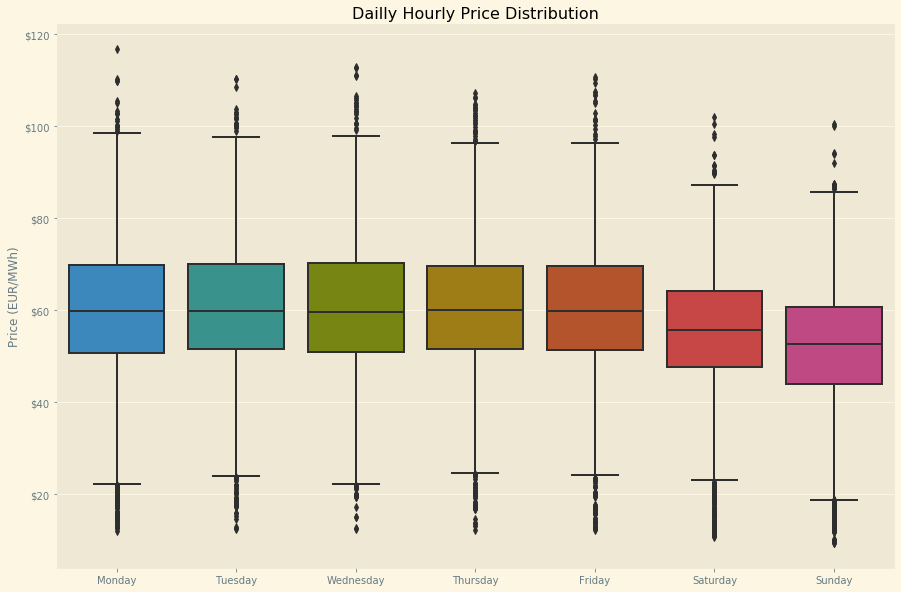

In [74]:
#Set figure
f, ax = plt.subplots(figsize = (15,10))

#PLot data
sns.boxplot(x='weekday', y='price actual', data = price_df,
           order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

###Set plot aesthetics###
ax.set_title('Dailly Hourly Price Distribution')
ax.set_xlabel('')
ax.set_ylabel('Price (EUR/MWh)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

#Save Figure
plt.savefig(viz_path + '/Daily_Boxplots.png',bbox_inches='tight')

**Hourly Price Boxplots**

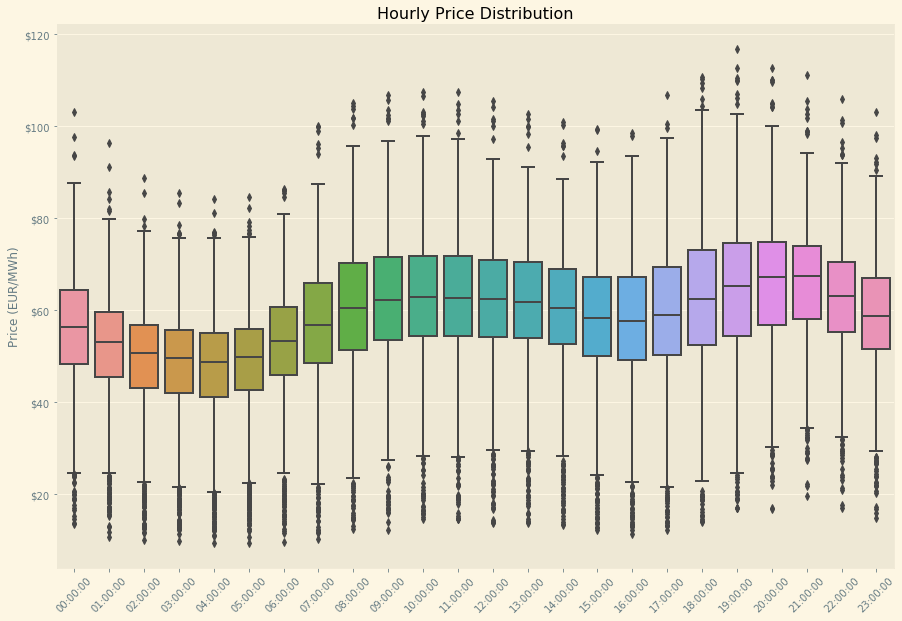

In [75]:
hours = price_df.groupby('time')['price actual'].mean().reset_index()

#Set figure
f, ax = plt.subplots(figsize = (15,10))

#PLot data
sns.boxplot(x='time', y='price actual', data = price_df)

###Set plot aesthetics###
ax.set_title('Hourly Price Distribution')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set_ylabel('Price (EUR/MWh)')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

#Save Figure
plt.savefig(viz_path + '/Hourly_Boxplots.png',bbox_inches='tight')